In [5]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk
import pandas as pd
import numpy as np
import math as mt
import tkinter as tk

#import pygame
# from PySide6.QtWidgets import QApplication, QDialog
#
# from tims_interface import Ui_Dialog
# import sys
# from scipy.optimize import fsolve


class Main:
    def read_from_file(self):
        with open("Data.txt") as f:
            lines = f.readlines()
            lines = [i.replace("\n", "") for i in lines]
            matrix = [[float(j) for j in i.split(",")] for i in lines]
        return matrix

    def get_x_i(self):
        return self.read_from_file()[0][1:]

    def get_y_i(self):
        matrix = self.read_from_file()
        return [matrix[i][0] for i in range(1, len(matrix))]

    def get_n_i(self):
        matrix = self.read_from_file()
        return [sum([matrix[i][j] for i in range(1, len(matrix))]) for j in range(1, len(matrix[0]))]

    def get_m_i(self):
        matrix = self.read_from_file()
        return [sum(matrix[i][1:]) for i in range(1, len(matrix))]

    def Y_vybirkove(self):
        yi, arrX, arrY, arrN, matrix = [], self.get_x_i(), self.get_y_i(), self.get_n_i(), self.read_from_file()

        for i in range(len(arrY)+1):
            elems = []
            for j in range(len(arrX) - 1):
                elem = matrix[j + 1][i + 1] * arrY[j]
                elems.append(elem)
            yi.append(sum(elems))

        result = [y / arrN[i] for i, y in enumerate(yi)]
        return result

    def Table(self):
        arrY = self.Y_vybirkove()
        new_y = [round(i, 3) for i in arrY]
        return pd.DataFrame({'X': self.get_x_i(), '-Y': new_y, 'Ni': self.get_n_i()})


    # Обчислення значень показникової функції для кожного x
    def GraphicM3(self):
        arrxi = self.get_x_i()
        arryi = self.Y_vybirkove()
        root3 = tk.Tk()
        
        arrx = np.linspace(min(arrxi), max(arrxi)+1, 10)
        y = 2.75*np.exp(arrx)
        yy = [i**2 for i in arrx]
        a_ = 0  # Параметр a
        b_ = 1  # Параметр b
        y1 = [np.sqrt(a_**2 + (b_*x)**2) for x in arrx]  # Верхня гілка гіперболи
        y2 = [-np.sqrt(a_**2 + (b_*x)**2) for x in arrx]   # Нижня гілка гіперболи
        yyy = [x**0.5 for x in arrx]
        plt.close("all")
        #fig5, ax5 = plt.subplots()
        
        fig5 = plt.figure(figsize=(6, 4), dpi=100)
        ax5 = fig5.add_subplot(111)
        ax5.plot(arrxi, arryi, marker='o', linestyle='-', color='blue', label='Графік моєї функції')
        ax5.plot(arrx, yy, color='red', label='Парабола')
        ax5.plot(arrx, y, color='green', label='Експонента')
        ax5.plot(arrx, y1, color='orange', label='Верхня гілка гіперболи')
        ax5.plot(arrx, y2, color='orange', label='Нижня гілка гіперболи')
        ax5.plot(arrx, yyy, color='purple', label='Коренева функція')
        #plt.ylim(0, 12)  
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Графік точок Mi(x,y-) ')
        plt.grid(True)

        plt.legend()
        plt.show()
        canvas = FigureCanvasTkAgg(fig5, master=root3)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root3)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root3.mainloop()
        plt.close(fig5)

    # 1) Parabola fx= ax^2+bx+c
    def GraphicM(self):
        arrxi = self.get_x_i()
        arryi = self.Y_vybirkove()
        root = tk.Tk()
        arrx = np.linspace(min(arrxi), max(arrxi)+1, 1000)
        # y = 2.75*np.exp(arrx)
        yy = [i**2 for i in arrx]
        # a_ = 0  # Параметр a
        # b_ = 1  # Параметр b
        # y1 = [np.sqrt(a_**2 + (b_*x)**2) for x in arrx]  # Верхня гілка гіперболи
        # y2 = [-np.sqrt(a_**2 + (b_*x)**2) for x in arrx]   # Нижня гілка гіперболи
        # yyy = [x**0.5 for x in arrx]
        plt.close("all")
        fig4 = plt.figure(figsize=(6, 4), dpi=100)
        ax4 = fig4.add_subplot(111)
        #fig4, ax4 = plt.subplots()
        ax4.plot(arrxi, arryi, marker='o', linestyle='-', color='blue', label='Графік моєї функції')
        ax4.plot(arrx, yy, color='red', label='Парабола')
        # plt.plot(arrx, y, color='green', label='Експонента')
        # plt.plot(arrx, y1, color='orange', label='Верхня гілка гіперболи')
        # plt.plot(arrx, y2, color='orange', label='Нижня гілка гіперболи')
        # plt.plot(arrx, yyy, color='purple', label='Коренева функція')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Графік точок Mi(x,y-)')
        plt.grid(True)

        plt.legend()
        plt.show()
        canvas = FigureCanvasTkAgg(fig4, master=root)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root.mainloop()

    def Sum(self):
        arr = self.get_n_i()
        arrx = self.get_x_i()
        y_vybirkove = self.Y_vybirkove()
        sum1_ = sum([arr[i] * (arrx[i] ** 4) for i in range(len(arr))])
        sum2_ = sum([arr[i] * (arrx[i] ** 3) for i in range(len(arr))])
        sum3_ = sum([arr[i] * (arrx[i] ** 2) for i in range(len(arr))])
        sum4_ = sum([arr[i] * y_vybirkove[i] * arrx[i] ** 2 for i in range(len(arr))])
        sum5_ = sum([arr[i] * arrx[i] for i in range(len(arr))])
        sum6_ = sum([arr[i] * y_vybirkove[i] * arrx[i] for i in range(len(arr))])
        sum7_ = sum([arr[i] * y_vybirkove[i] for i in range(len(arr))])
        n = sum(arr)
        return sum1_, sum2_, sum3_, sum4_, sum5_, sum6_, sum7_, n

    def system_eq(self):
        sum1, sum2, sum3, sum4, sum5, sum6, sum7, n = self.Sum()
        return f'{round(sum1, 3)}*A + {round(sum2, 3)}*B + {round(sum3, 3)}*C = {round(sum4, 3)}\n\n{round(sum2, 3)}*A + {round(sum3, 3)}*B + {round(sum5, 3)}*C = {round(sum6, 3)}\n\n{round(sum3, 3)}*A + {round(sum5, 3)}*B + {round(n, 3)}*C = {round(sum7, 3)}'

    def gauss_elimination(self):
        a11, a12, a13, b1, a32, b2, b3, a33 = self.Sum()
        a21 = a12
        a22 = a13
        a23 = a32
        a31 = a13

        # Elimination steps
        factor1 = a21 / a11
        factor2 = a31 / a11
        a22 -= factor1 * a12
        a23 -= factor1 * a13
        a32 -= factor2 * a12
        a33 -= factor2 * a13
        b2 -= factor1 * b1
        b3 -= factor2 * b1

        factor3 = a32 / a22
        a33 -= factor3 * a23
        b3 -= factor3 * b2

        # Back substitution
        C =b3 / a33
        B = (b2 - a23 * C) / a22
        A = (b1 - a12 * B - a13 * C) / a11


        return A, B, C

    def Solve_pow(self):
        A, B, C = self.gauss_elimination()
        return [A * (i ** 2) + B * i + C for i in self.get_x_i()], A, B, C

    def A_value(self):
        fx, A, B, C = self.Solve_pow()
        return f'{round(A, 3)}'

    def B_value(self):
        fx, A, B, C = self.Solve_pow()
        return f'{round(B, 3)}'

    def C_value(self):
        fx, A, B, C = self.Solve_pow()
        return f'{round(C, 3)}'

    def fx_value(self):
        fx, A, B, C = self.Solve_pow()
        return f'{round(A, 3)} * х^2 + {round(B, 3)} * x + {round(C, 3)}'

    def Sigma(self):
        temps = []
        arr = self.get_n_i()
        arry = self.get_y_i()

        n = sum(arr)
        fx, A, B, C = self.Solve_pow()
        matrix = self.MatrixWithout_xy()
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                temp = matrix[i][j] * (abs(arry[i] - fx[j])) ** 2
                temps.append(temp)
        return sum(temps) / n

    def Delta(self):
        temps = []
        arr = self.get_n_i()

        y_vybirkove = self.Y_vybirkove()
        fx, A, B, C = self.Solve_pow()
        for i in range(0, len(y_vybirkove)):
            temp = arr[i] * ((abs(y_vybirkove[i] - fx[i])) ** 2)
            temps.append(temp)

        return sum(temps)

    def Sigma_value(self):
        return f'{round(self.Sigma(), 3)}'

    def Delta_value(self):
        return f'{round(self.Delta(), 3)}'


    def Graphic_fx(self):
        plt.close("all")
        root1 = tk.Tk()
        fx, A, B, C = self.Solve_pow()
        fig1 = plt.figure(figsize=(6, 4), dpi=100)
        ax1 = fig1.add_subplot(111)
        ax1.plot(self.get_x_i(), fx, linestyle=':', color='black', label='Крива регресії f(x)')  # крива регресії
        ax1.plot(self.get_x_i(), self.Y_vybirkove(), marker='o', linestyle=':', color='blue',
                 label='M(xi,y_)')  # моя функція
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Порівняння з параболічною функцією')
        plt.grid(True)
        plt.legend()
        plt.show()
        canvas = FigureCanvasTkAgg(fig1, master=root1)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root1)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root1.mainloop()

    #2) hyperbola fx = a\x + b
    def Sum2(self):
        arr = self.get_n_i()
        arrx = self.get_x_i()
        y_vybirkove = self.Y_vybirkove()
        sum1_ = sum([arr[i] / arrx[i] if arrx[i] != 0 else 0 for i in range(len(arr))])
        sum2_ = sum([arr[i] * y_vybirkove[i] for i in range(len(arr))])
        sum3_ = sum([arr[i] / (arrx[i]) ** 2 if arrx[i] != 0 else 0 for i in range(len(arr))])
        sum4_ = sum([arr[i] * y_vybirkove[i] / arrx[i] if arrx[i] != 0 else 0 for i in range(len(arr))])
        n = sum(arr)
        return sum1_, sum2_, sum3_, sum4_, n

    def system_eq2(self):
        sum1, sum2, sum3, sum4, n = self.Sum2()
        return f'A*{round(sum1,3)} + {n}*B = {round(sum2,3)} \n\nA*{round(sum3,3)} + B*{round(sum1,3)} = {round(sum4,3)}'

    def gauss_elimination2(self):
        sum1, sum2, sum3, sum4, n = self.Sum2()
        a11 = sum1
        a12 = n
        a21 = sum3
        a22 = sum1
        b1 = sum2
        b2 = sum4

        # Elimination steps
        factor = a21 / a11
        a22 -= factor * a12
        b2 -= factor * b1

        # Back substitution
        B = b2 / a22
        A = (b1 - a12 * B) / a11

        return A, B

    def Solve_pow2(self):
        A, B = self.gauss_elimination2()
        arrX = self.get_x_i()
        results = []
        for i in arrX:
            if i != 0:
                result = A / i + B
            else:
                result = 0
            results.append(result)
        return results, A, B


    def A_value2(self):
        fx, A, B = self.Solve_pow2()
        return f'{round(A, 3)}'

    def B_value2(self):
        fx, A, B = self.Solve_pow2()
        return f'{round(B, 3)}'

    def fx_value2(self):
        fx, A, B = self.Solve_pow2()
        return f'{round(A, 3)}/x + {round(B, 3)}'


    def GraphicM2(self):
        arrxi = self.get_x_i()
        arryi = self.Y_vybirkove()
        root2 = tk.Tk()
        arrx = np.linspace(min(arrxi), max(arrxi) + 1, 1000)
        # y = 2.75 * np.exp(arrx)
        # yy = [i ** 2 for i in arrx]
        a_ = 0  # Параметр a
        b_ = 1  # Параметр b
        y1 = [np.sqrt(a_ ** 2 + (b_ * x) ** 2) for x in arrx]  # Верхня гілка гіперболи
        y2 = [-np.sqrt(a_ ** 2 + (b_ * x) ** 2) for x in arrx]  # Нижня гілка гіперболи
        # yyy = [x ** 0.5 for x in arrx]
        plt.close("all")
        fig3 = plt.figure(figsize=(6, 4), dpi=100)
        ax3 = fig3.add_subplot(111)
        #fig3, ax3 = plt.subplots()
        ax3.plot(arrxi, arryi, marker='o', linestyle='-', color='blue', label='Графік моєї функції')
        #ax3.plot(arrx, yy, color='red', label='Парабола')
        #ax3.plot(arrx, y, color='green', label='Експонента')
        ax3.plot(arrx, y1, color='orange', label='Верхня гілка гіперболи')
        ax3.plot(arrx, y2, color='orange', label='Нижня гілка гіперболи')
        #ax3.plot(arrx, yyy, color='purple', label='Коренева функція')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Графік точок Mi(x,y-)')
        plt.grid(True)
        plt.legend()

        plt.show()
        canvas = FigureCanvasTkAgg(fig3, master=root2)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root2)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root2.mainloop()


    def Graphic_fx2(self):
        plt.close("all")
        root4 = tk.Tk()
        fx, A, B = self.Solve_pow2()
        arrX = self.get_x_i()
        fig2 = plt.figure(figsize=(6, 4), dpi=100)
        ax2 = fig2.add_subplot(111)
        ax2.plot(arrX,fx, linestyle=':', color='black', label='Крива регресії f(x)' )  # крива регресії
        ax2.plot(arrX, self.Y_vybirkove(), marker='o', linestyle=':', color='blue', label='M(xi,y_)') # моя функція
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Порівняння з гіперболічною функцією')
        plt.grid(True)
        plt.legend()
        plt.show()
        canvas = FigureCanvasTkAgg(fig2, master=root4)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root4)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root4.mainloop()


    def Sigma2(self):
        temps = []
        arry = self.get_y_i()
        sum1, sum2, sum3, sum4, n = self.Sum2()
        fx, A, B = self.Solve_pow2()
        matrix = self.MatrixWithout_xy()
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                temp = matrix[i][j]*(abs(arry[i]-fx[j]))**2
                temps.append(temp)
        return sum(temps) / n


    def Sigma_value2(self):
        return f'{round(self.Sigma2(),3)}'

    def Delta2(self):
        temps = []
        arrn = self.get_n_i()
        arry = self.Y_vybirkove()
        fx, A, B = self.Solve_pow2()
        for i in range(0,len(arry)):
            temp = arrn[i]*(abs(arry[i]-fx[i]))**2
            temps.append(temp)

        return sum(temps)


    def Delta_value2(self):
        return f'{round(self.Delta2(),3)}'


    #3) exponent corelation fx = ba^x,  a,b -?

    def Sum3(self):
        arr = self.get_n_i()
        arrx = self.get_x_i()
        arry = self.Y_vybirkove()

        sum1 = sum([arr[i] * (arrx[i]) for i in range(len(arr))])
        sum2 = sum([arr[i] * mt.log10(arry[i]) for i in range(len(arr))])
        sum3 = sum([arr[i] * (arrx[i])**2 for i in range(len(arr))])
        sum4 = sum([arr[i] * (arrx[i]) * mt.log10(arry[i])  for i in range(len(arr))])

        n = sum(arr)
        return sum1, sum2, sum3, sum4, n



    def system_eq3(self):
        sum1,sum2,sum3,sum4,n = self.Sum3()
        return f'lg(a)*{round(sum1,3)} + {n}*lg(b) = {round(sum2,3)} \n\nlg(a)*{round(sum3,3)} + lg(b)*{round(sum1,3)} = {round(sum4,3)}'


    def gauss_elimination3(self):
        sum1, sum2, sum3, sum4, n = self.Sum3()
        a11 = sum1
        a12 = n
        a21 = sum3
        a22 = sum1
        b1 = sum2
        b2 = sum4

        # Elimination steps
        factor = a21 / a11
        a22 -= factor * a12
        b2 -= factor * b1

        # Back substitution
        B = b2 / a22
        A = (b1 - a12 * B) / a11

        return A, B

    def Solve_pow3(self):
        A, B = self.gauss_elimination3()
        arrX = self.get_x_i()
        A, B = 10 ** A, 10 ** B
        return [B * A ** i for i in arrX], A, B

    # fx,A,B = Solve_pow()

    def A_value3(self):
        fx, A, B = self.Solve_pow3()
        return f'{round(A,3)}'

    def B_value3(self):
        fx, A, B = self.Solve_pow3()
        return f'{round(B,3)}'


    def fx_value3(self):
        fx, A, B = self.Solve_pow3()
        return f'{round(B,3)}*{round(A,3)}^x'


    def Graphic_fx3(self):
        plt.close("all")
        root5 = tk.Tk()
        fx, A, B = self.Solve_pow3()
        arrX = self.get_x_i()
        fig6 = plt.figure(figsize=(6, 4), dpi=100)
        ax6 = fig6.add_subplot(111)
        ax6.plot(arrX,fx, linestyle=':', color='black', label='Крива регресії f(x)' )  # крива регресії
        ax6.plot(arrX, self.Y_vybirkove(), marker='o', linestyle=':', color='blue', label='M(xi,y_)') # моя функція
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Порівняння з показниковою функцією')
        plt.grid(True)
        plt.legend()
        plt.show()
        canvas = FigureCanvasTkAgg(fig6, master=root5)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root5)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root5.mainloop()

    def MatrixWithout_xy(self):
        matrix_without_xy = self.read_from_file().copy()
        return [row[1:] for row in matrix_without_xy[1:]]


    def Sigma3(self):
        temps = []
        arry = self.get_y_i()
        sum1, sum2, sum3, sum4, n = self.Sum3()
        fx, A, B = self.Solve_pow3()
        matrix = self.MatrixWithout_xy()
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                temp = matrix[i][j]*(abs(arry[i]-fx[j]))**2
                temps.append(temp)
        return sum(temps) / n


    def Sigma_value3(self):
        return f'{round(self.Sigma3(),3)}'

    def Delta3(self):
        temps = []
        arrn = self.get_n_i()
        arry = self.Y_vybirkove()
        fx, A, B = self.Solve_pow3()
        for i in range(0,len(arry)):
            temp = arrn[i]*(abs(arry[i]-fx[i]))**2
            temps.append(temp)

        return sum(temps)


    def Delta_value3(self):
        return f'{round(self.Delta3(),3)}'


#----------------------------------------------------------------
#4) sqrt corelation fx = a*x**0.5+b  a,b -?

    def Sum4(self):
        arr = self.get_n_i()
        arrx = self.get_x_i()
        arry = self.Y_vybirkove()
        sum1_ = sum([arr[i] * np.sqrt(arrx[i]) for i in range(len(arr))])
        sum2_ = sum([arr[i] * arry[i] for i in range(len(arr))])
        sum3_ = sum([arr[i] * arrx[i] for i in range(len(arr))])
        sum4_ = sum([arr[i] * arry[i] * np.sqrt(arrx[i]) for i in range(len(arr))])
        n = sum(arr)
        return sum1_, sum2_, sum3_,sum4_, n

    def system_eq4(self):
        sum1, sum2, sum3, sum4, n = self.Sum4()
        return f'A*{round(sum1,3)} + {n}*B = {round(sum2,3)} \n\nA*{round(sum3,3)} + B*{round(sum1,3)} = {round(sum4,3)}'

    def gauss_elimination4(self):
        a11, b1, a21, b2, a12 = self.Sum4()
        a22 = a11

        # Elimination steps
        factor = a21 / a11
        a22 -= factor * a12
        b2 -= factor * b1

        # Back substitution
        B = b2 / a22
        A = (b1 - a12 * B) / a11

        return A, B


    def Solve_pow4(self):
        A, B = self.gauss_elimination4()
        arryx = self.get_x_i()
        return [A*np.sqrt(i)+B for i in arryx], A, B

    def A_value4(self):
        fx, A, B = self.Solve_pow4()
        return f'{round(A,3)}'

    def B_value4(self):
        fx, A, B = self.Solve_pow4()
        return f'{round(B,3)}'

    def fx_value4(self):
        fx, A, B = self.Solve_pow4()
        return f'{round(A,3)}*√х+{round(B,3)}'


    def GraphicM4(self):
        plt.close("all")
        root6 = tk.Tk()
        arryx = self.get_x_i()
        plt.close("all")
        fig7 = plt.figure(figsize=(6, 4), dpi=100)
        ax7 = fig7.add_subplot(111)
        y = np.sqrt(arryx)
        yy = [i ** 2 for i in arryx]
        ax7.plot(arryx, self.Y_vybirkove(), marker='o', linestyle='-', color='blue')
        # ax1.plot(x_values,yy, color='red')
        ax7.plot(arryx, y, color='green')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Графік точок(x,y-)')
        plt.grid(True)
        plt.show()
        canvas = FigureCanvasTkAgg(fig7, master=root6)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root6)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root6.mainloop()


    def Graphic_fx4(self):
        plt.close("all")
        root7 = tk.Tk()
        arryx = self.get_x_i()
        fx, A, B = self.Solve_pow4()
        fig8 = plt.figure(figsize=(6, 4), dpi=100)
        ax8 = fig8.add_subplot(111)
        
        ax8.plot(arryx,fx, color='black')
        ax8.plot(arryx, self.Y_vybirkove() , marker='o', linestyle='-', color='blue')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Порівняння з коренневою функцією')
        plt.grid(True)
        plt.show()
        canvas = FigureCanvasTkAgg(fig8, master=root7)
        canvas.draw()

        canvas.get_tk_widget().pack()
        toolbar = NavigationToolbar2Tk(canvas, root7)
        toolbar.update()
        canvas.get_tk_widget().pack()
        root7.mainloop()

    def Sigma4(self):
        temps = []
        arry = self.get_y_i()
        sum1, sum2, sum3, sum4, n = self.Sum4()
        fx, A, B = self.Solve_pow4()
        matrix = self.MatrixWithout_xy()
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                temp = matrix[i][j] * (abs(arry[i] - fx[j])) ** 2
                temps.append(temp)
        return sum(temps) / n


    def Delta4(self):
        temps, arrn, arry = [], self.get_n_i(), self.Y_vybirkove()
        fx, A, B = self.Solve_pow4()
        for i in range(0, len(self.Y_vybirkove())):
            temp = arrn[i] * (abs(arry[i] - fx[i])) ** 2
            temps.append(temp)

        return sum(temps)

    def Sigma_value4(self):
        return f'{round(self.Sigma4(),3)}'

    def Delta_value4(self):
        return f'{round(self.Delta4(),3)}'
    
    def EditFile(self):
        from os import startfile
        startfile('Data.txt')


main = Main()
print(main.fx_value2())
print(main.A_value2(), main.B_value2())
print(main.Sigma_value2())
print(main.Delta_value2())
print(main.Sum2())
# main.Graphic_fx4()
    

-9.575/x + 3.766
-9.575 3.766
0.295
40.389
(23.479918121094588, 381.5, 4.627651540021972, 44.11491057961646, 161.0)


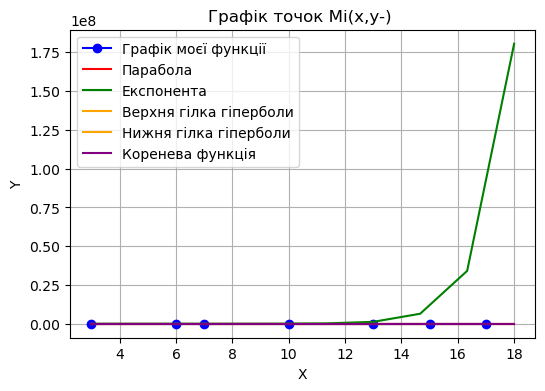

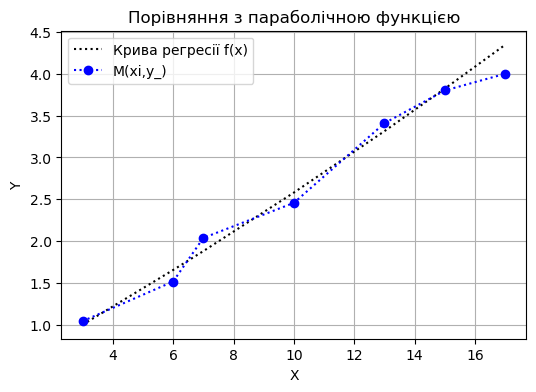

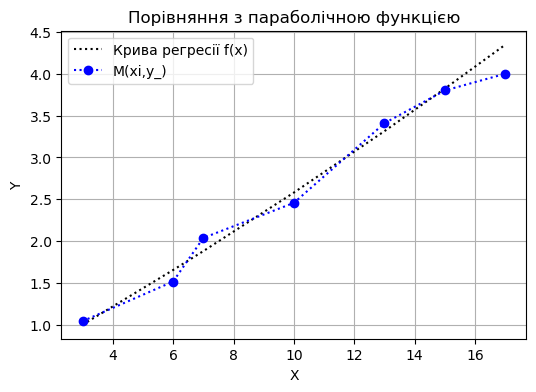

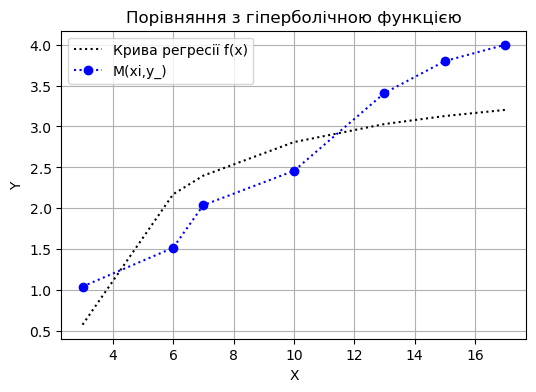

SystemExit: 0

C:\Users\roman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
from PySide6.QtCore import (QCoreApplication, QDate, QDateTime, QLocale,
    QMetaObject, QObject, QPoint, QRect,
    QSize, QTime, QUrl, Qt)
from PySide6.QtGui import (QBrush, QColor, QConicalGradient, QCursor,
    QFont, QFontDatabase, QGradient, QIcon,
    QImage, QKeySequence, QLinearGradient, QPainter,
    QPalette, QPixmap, QRadialGradient, QTransform)
from PySide6.QtWidgets import (QApplication, QComboBox, QDialog, QHeaderView,
    QLabel, QPushButton, QSizePolicy, QTableWidget,
    QTableWidgetItem, QWidget)

import sys
#from main import *
class Ui_Dialog(object):
    def setupUi(self, Dialog):
        self.main = Main()
        if not Dialog.objectName():
            Dialog.setObjectName(u"Dialog")
        Dialog.resize(723, 569)
        Dialog.setStyleSheet(
            u"background-color: qlineargradient(spread:pad, x1:1, y1:0, x2:0, y2:1, stop:0 rgba(255, 255, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 165, 0, 255));")
        self.Table = QTableWidget(Dialog)
        if (self.Table.columnCount() < 3):
            self.Table.setColumnCount(3)
        font = QFont()
        font.setPointSize(10)
        font.setBold(True)
        __qtablewidgetitem = QTableWidgetItem()
        __qtablewidgetitem.setFont(font);
        __qtablewidgetitem.setBackground(QColor(90, 255, 178));
        self.Table.setHorizontalHeaderItem(0, __qtablewidgetitem)
        __qtablewidgetitem1 = QTableWidgetItem()
        __qtablewidgetitem1.setFont(font);
        __qtablewidgetitem1.setBackground(QColor(208, 208, 208));
        self.Table.setHorizontalHeaderItem(1, __qtablewidgetitem1)
        __qtablewidgetitem2 = QTableWidgetItem()
        __qtablewidgetitem2.setFont(font);
        __qtablewidgetitem2.setBackground(QColor(208, 208, 208));
        self.Table.setHorizontalHeaderItem(2, __qtablewidgetitem2)
        if (self.Table.rowCount() < 7):
            self.Table.setRowCount(7)
        __qtablewidgetitem3 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(0, __qtablewidgetitem3)
        __qtablewidgetitem4 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(1, __qtablewidgetitem4)
        __qtablewidgetitem5 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(2, __qtablewidgetitem5)
        __qtablewidgetitem6 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(3, __qtablewidgetitem6)
        __qtablewidgetitem7 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(4, __qtablewidgetitem7)
        __qtablewidgetitem8 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(5, __qtablewidgetitem8)
        __qtablewidgetitem9 = QTableWidgetItem()
        self.Table.setVerticalHeaderItem(6, __qtablewidgetitem9)
        icon = QIcon(QIcon.fromTheme(u"accessories-calculator"))
        brush = QBrush(QColor(0, 0, 0, 255))
        brush.setStyle(Qt.NoBrush)
        brush1 = QBrush(QColor(107, 107, 107, 255))
        brush1.setStyle(Qt.NoBrush)
        self.populateTable()

        self.Table.setObjectName(u"Table")
        self.Table.setGeometry(QRect(420, 0, 301, 271))
        self.Table.setFont(font)
        self.Table.setLayoutDirection(Qt.LeftToRight)
        self.Table.setAutoFillBackground(False)
        self.Table.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
                                 "gridline-color: rgb(0, 0, 0);\n"
                                 "border-color: rgb(0, 0, 0);\n"
                                 "color: rgb(0, 0, 0);\n"
                                 "\n"
                                 "\n"
                                 "")
        self.Table.horizontalHeader().setVisible(False)
        self.Table.horizontalHeader().setCascadingSectionResizes(False)
        self.Table.verticalHeader().setVisible(False)
        self.equation_label = QLabel(Dialog)
        self.equation_label.setObjectName(u"equation_label")
        self.equation_label.setGeometry(QRect(120, 10, 181, 31))
        self.equation_label.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 10pt \"Script MT Bold\";\n"
"\n"
"\n"
"")
        self.equations = QLabel(Dialog)
        self.equations.setObjectName(u"equations")
        self.equations.setGeometry(QRect(80, 60, 261, 161))
        self.equations.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 10pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.A_ = QLabel(Dialog)
        self.A_.setObjectName(u"A_")
        self.A_.setGeometry(QRect(80, 240, 61, 31))
        self.A_.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"\n"
"")
        self.A_value = QLabel(Dialog)
        self.A_value.setObjectName(u"A_value")
        self.A_value.setGeometry(QRect(170, 240, 91, 31))
        self.A_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.B_value = QLabel(Dialog)
        self.B_value.setObjectName(u"B_value")
        self.B_value.setGeometry(QRect(170, 280, 91, 31))
        self.B_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.B_ = QLabel(Dialog)
        self.B_.setObjectName(u"B_")
        self.B_.setGeometry(QRect(80, 280, 61, 31))
        self.B_.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"\n"
"")
        self.fx = QLabel(Dialog)
        self.fx.setObjectName(u"fx")
        self.fx.setGeometry(QRect(80, 360, 61, 31))
        self.fx.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"\n"
"")
        self.fx_value = QLabel(Dialog)
        self.fx_value.setObjectName(u"fx_value")
        self.fx_value.setGeometry(QRect(170, 360, 241, 31))
        self.fx_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.sigma = QLabel(Dialog)
        self.sigma.setObjectName(u"sigma")
        self.sigma.setGeometry(QRect(80, 410, 71, 31))
        self.sigma.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"\n"
"")

        self.delta = QLabel(Dialog)
        self.delta.setObjectName(u"delta")
        self.delta.setGeometry(QRect(80, 460, 71, 31))
        self.delta.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"\n"
"")
        self.sigma_value = QLabel(Dialog)
        self.sigma_value.setObjectName(u"sigma_value")
        self.sigma_value.setGeometry(QRect(170, 410, 91, 31))
        self.sigma_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.delta_value = QLabel(Dialog)
        self.delta_value.setObjectName(u"delta_value")
        self.delta_value.setGeometry(QRect(170, 460, 91, 31))
        self.delta_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
"font: 700 11pt \"Segoe UI\";\n"
"\n"
"\n"
"\n"
"")
        self.Graphic1 = QPushButton(Dialog)
        self.Graphic1.setObjectName(u"Graphic1")
        self.Graphic1.setGeometry(QRect(470, 280, 221, 51))
        self.Graphic1.setStyleSheet(u"/*background-color: rgba(255, 255, 255,200);*/\n"
                                    "border: 5px;\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "\n"
                                    "border-radius: 25px;\n"
                                    "font: 700 8pt \"Georgia\";\n"
                                    "color: rgb(0, 0, 0);\n"
                                    "background-color: qlineargradient(spread:pad, x1:1, y1:1, x2:0, y2:0, stop:0 rgba(255, 165, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 255, 0, 255));")
        self.Graphic2 = QPushButton(Dialog)
        self.Graphic2.setObjectName(u"Graphic2")
        self.Graphic2.setGeometry(QRect(470, 340, 221, 51))
        self.Graphic2.setStyleSheet(u"/*background-color: rgba(255, 255, 255,200);*/\n"
                                    "border: 5px;\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "\n"
                                    "border-radius: 25px;\n"
                                    "font: 700 10pt \"Georgia\";\n"
                                    "color: rgb(0, 0, 0);\n"
                                    "background-color: qlineargradient(spread:pad, x1:1, y1:1, x2:0, y2:0, stop:0 rgba(255, 165, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 255, 0, 255));")
        self.comboBox = QComboBox(Dialog)
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.addItem("")
        self.comboBox.setObjectName(u"comboBox")
        self.comboBox.setGeometry(QRect(480, 410, 221, 51))
        self.comboBox.setStyleSheet(u"/*background-color: rgba(255, 255, 255,200);*/\n"
                                    "border: 5px;\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "border-color: rgb(255, 255, 255);\n"
                                    "\n"
                                    "font: 700 10pt \"Georgia\";\n"
                                    "color: rgb(0, 0, 0);\n"
                                    "background-color: qlineargradient(spread:pad, x1:1, y1:1, x2:0, y2:0, stop:0 rgba(255, 165, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 255, 0, 255));")
        self.C_value = QLabel(Dialog)
        self.C_value.setObjectName(u"C_value")
        self.C_value.setGeometry(QRect(170, 320, 91, 31))
        self.C_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
                                   "font: 700 11pt \"Segoe UI\";\n"
                                   "\n"
                                   "\n"
                                   "\n"
                                   "")
        self.C_ = QLabel(Dialog)
        self.C_.setObjectName(u"C_")
        self.C_.setGeometry(QRect(80, 320, 61, 31))
        self.C_.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
                              "font: 700 11pt \"Segoe UI\";\n"
                              "\n"
                              "\n"
                              "\n"
                              "\n"
                              "")
        self.Calculate = QPushButton(Dialog)
        self.Calculate.setObjectName(u"Calculate")
        self.Calculate.setGeometry(QRect(320, 410, 121, 51))
        self.Calculate.setStyleSheet(u"/*background-color: rgba(255, 255, 255,200);*/\n"
                                     "border: 5px;\n"
                                     "border-color: rgb(255, 255, 255);\n"
                                     "border-color: rgb(255, 255, 255);\n"
                                     "\n"
                                     "border-radius: 25px;\n"
                                     "font: 700 10pt \"Georgia\";\n"
                                     "color: rgb(0, 0, 0);\n"
                                     "background-color: qlineargradient(spread:pad, x1:1, y1:1, x2:0, y2:0, stop:0 rgba(255, 165, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 255, 0, 255));")
        self.EditMatrix = QPushButton(Dialog)
        self.EditMatrix.setObjectName(u"EditMatrix")
        self.EditMatrix.setGeometry(QRect(0, 530, 721, 41))
        self.EditMatrix.setStyleSheet(u"/*background-color: rgba(255, 255, 255,200);*/\n"
                                      "border: 5px;\n"
                                      "border-color: rgb(255, 255, 255);\n"
                                      "border-color: rgb(255, 255, 255);\n"
                                      "\n"
                                      "border-radius: 25px;\n"
                                      "font: 700 10pt \"Georgia\";\n"
                                      "color: rgb(0, 0, 0);\n"
                                      "background-color: qlineargradient(spread:pad, x1:1, y1:1, x2:0, y2:0, stop:0 rgba(255, 165, 0, 255), stop:0.427447 rgba(255, 215, 0, 235), stop:1 rgba(255, 255, 0, 255));")


        # self.labelC = QLabel(Dialog)
        # self.labelC.setObjectName(u"B_1")
        # self.labelC.setGeometry(QRect(380, 250, 61, 31))
        # self.labelC.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
        #                           "font: 700 11pt \"Segoe UI\";\n")
        # self.C_value = QLabel(Dialog)
        # self.C_value.setObjectName(u"B_value_2")
        # self.C_value.setGeometry(QRect(470, 250, 91, 31))
        # self.C_value.setStyleSheet(u"background-color: rgba(255, 255, 255,155);\n"
        #                              "font: 700 11pt \"Segoe UI\";\n")

        self.retranslateUi(Dialog)

        QMetaObject.connectSlotsByName(Dialog)
    # setupUi
    def populateTable(self):

        table_data = self.main.Table()


        table_widget = self.Table


        table_widget.setRowCount(table_data.shape[0])
        table_widget.setColumnCount(table_data.shape[1])



        for i, row in enumerate(table_data.values, start =-1):
            if i == 0:
                item1 = QTableWidgetItem("   X")
                table_widget.setItem(0, 0, item1)

                item1 = QTableWidgetItem("   Y-")
                table_widget.setItem(0, 1, item1)

                item1 = QTableWidgetItem("   Ni")
                table_widget.setItem(0, 2, item1)


            for j, value in enumerate(row):
                item = QTableWidgetItem(str(value))
                table_widget.setItem(i+1, j, item)
    def retranslateUi(self, Dialog):
        Dialog.setWindowTitle(QCoreApplication.translate("Dialog", u"Dialog", None))


        __sortingEnabled = self.Table.isSortingEnabled()
        self.Table.setSortingEnabled(False)

        self.Table.setSortingEnabled(__sortingEnabled)

        self.equation_label.setText(QCoreApplication.translate("Dialog", u"         \u0421\u0438\u0441\u0442\u0435\u043c\u0430 \u0440\u0456\u0432\u043d\u044f\u043d\u044c ", None))
        self.equations.setText(QCoreApplication.translate("Dialog", u"{}".format(""), None))
        self.A_.setText(QCoreApplication.translate("Dialog", u" A   =", None))
        self.A_value.setText(QCoreApplication.translate("Dialog", u"  {}".format(0), None))
        self.B_value.setText(QCoreApplication.translate("Dialog", u"  {}".format(0), None))
        self.B_.setText(QCoreApplication.translate("Dialog", u" B   =", None))
        self.fx.setText(QCoreApplication.translate("Dialog", u" f(x) =", None))
        self.fx_value.setText(QCoreApplication.translate("Dialog", u" {}".format(0),None))
        self.sigma.setText(QCoreApplication.translate("Dialog", u"  \u03c3^2  =", None))
        self.delta.setText(QCoreApplication.translate("Dialog", u"   \u03b4^2  =", None))
        self.sigma_value.setText(QCoreApplication.translate("Dialog", u"   {}".format(0), None))
        self.delta_value.setText(QCoreApplication.translate("Dialog", u"   {}".format(0), None))
        self.Graphic1.setText(QCoreApplication.translate("Dialog", u"\u041f\u043e\u0431\u0443\u0434\u0443\u0432\u0430\u0442\u0438 \u0433\u0440\u0430\u0444\u0456\u043a \u0442\u043e\u0447\u043e\u043a M(x;y)", None))
        self.Graphic2.setText(QCoreApplication.translate("Dialog", u"\u041f\u043e\u0431\u0443\u0434\u0443\u0432\u0430\u0442\u0438 \u0433\u0440\u0430\u0444\u0456\u043a f(x)", None))
        self.comboBox.setItemText(0, QCoreApplication.translate("Dialog", u"\u041f\u0430\u0440\u0430\u0431\u043e\u043b\u0456\u0447\u043d\u0430 \u043a\u043e\u0440\u0435\u043b\u044f\u0446\u0456\u044f", None))
        self.comboBox.setItemText(1, QCoreApplication.translate("Dialog", u"\u0413\u0456\u043f\u0435\u0440\u0431\u043e\u043b\u0456\u0447\u043d\u0430 \u043a\u043e\u0440\u0435\u043b\u044f\u0446\u0456\u044f", None))
        self.comboBox.setItemText(2, QCoreApplication.translate("Dialog", u"\u041f\u043e\u043a\u0430\u0437\u043d\u0438\u043a\u043e\u0432\u0430 \u043a\u043e\u0440\u0435\u043b\u044f\u0446\u0456\u044f", None))
        self.comboBox.setItemText(3, QCoreApplication.translate("Dialog", u"\u041a\u043e\u0440\u0435\u043d\u0435\u0432\u0430 \u043a\u043e\u0440\u0435\u043b\u044f\u0446\u0456\u044f", None))
        self.Calculate.setText(QCoreApplication.translate("Dialog", u"\u041e\u0411\u0427\u0418\u0421\u041b\u0418\u0422\u0418", None))
        self.C_.setText(QCoreApplication.translate("Dialog", u" C   =", None))
        self.C_value.setText(QCoreApplication.translate("Dialog", u"  0", None))
        self.EditMatrix.setText(QCoreApplication.translate("Dialog",
                                                           u"\u0417\u043c\u0456\u043d\u0438\u0442\u0438 \u0432\u0445\u0456\u0434\u043d\u0443 \u043c\u0430\u0442\u0440\u0438\u0446\u044e",
                                                           None))
        self.Calculate.clicked.connect(self.handle_calculate)
        self.EditMatrix.clicked.connect(self.NewMatrix_Calculate)
        self.Graphic1.clicked.connect(self.main.GraphicM3)
        # self.Restart.setText("")
        # self.Restart.clicked.connect(self.populateTable)

    def Type_corelation(self):
        index = self.comboBox.currentIndex()
        if index == 2:
            return self.main.system_eq3(), self.main.A_value3(),self.main.B_value3(), self.main.fx_value3(),self.main.Sigma_value3(),self.main.Delta_value3(),self.main.GraphicM3, self.main.Graphic_fx3,0
        elif index == 3:
            return self.main.system_eq4(), self.main.A_value4(), self.main.B_value4(), self.main.fx_value4(), self.main.Sigma_value4(), self.main.Delta_value4(),self.main.GraphicM4, self.main.Graphic_fx4,0

        elif index == 1:
            return self.main.system_eq2(), self.main.A_value2(), self.main.B_value2(), self.main.fx_value2(), self.main.Sigma_value2(), self.main.Delta_value2(),self.main.GraphicM2, self.main.Graphic_fx2,0
        elif index == 0:
            return self.main.system_eq(), self.main.A_value(), self.main.B_value(), self.main.fx_value(), self.main.Sigma_value(), self.main.Delta_value(), self.main.GraphicM, self.main.Graphic_fx,self.main.C_value()
    def handle_calculate(self):
        data = self.Type_corelation()

        # Update the UI with the returned data
        self.equations.setText(QCoreApplication.translate("Dialog", u"{}".format(data[0]), None))
        self.A_value.setText(QCoreApplication.translate("Dialog", u"  {}".format(data[1]), None))
        self.B_value.setText(QCoreApplication.translate("Dialog", u"  {}".format(data[2]), None))
        self.fx_value.setText(QCoreApplication.translate("Dialog", u" {}".format(data[3]), None))
        self.sigma_value.setText(QCoreApplication.translate("Dialog", u"   {}".format(data[4]), None))
        self.delta_value.setText(QCoreApplication.translate("Dialog", u"   {}".format(data[5]), None))
        self.Graphic1.clicked.connect(data[6])
        self.Graphic2.clicked.connect(data[7])
        self.C_value.setText(QCoreApplication.translate("Dialog", u"  {}".format(data[8]), None))
        self.populateTable()

    def NewMatrix_Calculate(self):
        self.main.EditFile()
        self.handle_calculate()






class Interface:
    def __init__(self):
        self.dialog = QDialog()
        self.ui = Ui_Dialog()

        self.ui.setupUi(self.dialog)

if not QApplication.instance():
    app =QApplication(sys.argv)
else:
    app = QApplication.instance()

program = Interface()
program.dialog.show()

sys.exit(app.exec())

In [2]:
pip install PySide6

     ---------------------------------------- 1.1/1.1 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.6/65.6 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 108.5/108.5 MB ? eta 0:00:00
  Using cached PySide6-6.5.0-cp37-abi3-win_amd64.whl (7.2 kB)
  Using cached shiboken6-6.5.0-cp37-abi3-win_amd64.whl (1.1 MB)
     ---------------------------------------- 108.5/108.5 MB ? eta 0:00:00
  Using cached PySide6_Essentials-6.5.0-cp37-abi3-win_amd64.whl (65.6 MB)
Note: you may need to restart the kernel to use updated packages.
